## Сборный проект

 Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 
В нашем распоряжении данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

** В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

 - Name — название игры
    
 - Platform — платформа
 
 - Year_of_Release — год выпуска
 
 - Genre — жанр игры
 
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 
 - EU_sales — продажи в Европе (миллионы проданных копий)
 
 - JP_sales — продажи в Японии (миллионы проданных копий)
 
 - Other_sales — продажи в других странах (миллионы проданных копий)
 
 - Critic_Score — оценка критиков (максимум 100)
 
 - User_Score — оценка пользователей (максимум 10)
 
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
** Данные за 2016 год могут быть неполными.

### Изучение общей информации о датасете

1)Импортируем необходимые для решения поставленных задач библиотеки

2)Посмотрим на начало и конец предложенного датасета

3)Соберем общие статистические данные с помощью функции DataFrame.describe()

In [1]:
# Импортируем библиотеки
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Импортируем данные
df = pd.read_csv('games.csv')

# установим отображение количества столбцов на экране
pd.options.display.max_columns = 40

In [3]:
# Посмотрим на общую информацию о датасете, начало и описательные статистики 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


**Вывод:**

Предварительный просмотр данных позволяет выделить следующие проблемы:

1) Наличие пропусков в переменных Critic_Score (оценка критиков (максимум 100)), User_Score (оценка пользователей (максимум 10)) и Rating (рейтинг от организации ESRB)

2) Сочетание верхнего и нижнего регистра в названии столбцов и в самих данных

3) Некорректные типы данных ( например, переменная user_score имеет тип 'object', а нужен 'float', поскольку это численный показатель)


### Предобработка данных

#### Приведение столбцов к нижнему регистру 

In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Также для удобства приведем все данные в столбцах к нижнему регистру:

In [10]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df['rating'] = df['rating'].str.lower()

In [11]:
# проверим замену
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод:**
    
Теперь все данные приведены к нижнему регистру, и нам будет более удобно с ними работать. Перейдем к следующему этапу:

#### Обработка пропусков

In [12]:
# Посчитаем количество пропущенных значений
df.isnull().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

In [13]:
# напишем функцию для просмотра пропусков
def missing_values(data):
    display(pd.DataFrame(round(data.isnull().sum().sort_values()/len(data)*100, 2)).style.background_gradient('coolwarm'))

In [14]:
# Применим функцию для просмотра пропусков к нашим данным
missing_values(df)

,0
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
name,0.010000
genre,0.010000
year_of_release,1.610000
user_score,40.090000
rating,40.480000


Видим, что практически половина данных отсутствует по столбцам user_score (оценка пользователей) и rating ( рейтинг от организации ESRB). И чуть больше половины пропусков в переменной critic_score (оценка критиков).

Начнем с оценки пользователей и критиков - посмотрим на список уникальных значений:

In [15]:
# уникальные значения столбцов 

df['critic_score'].unique()


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Интересно, что может означать 'tbd' из-за которого переменная user_score имеет тип 'object'. В Кэмбриджском словаре эта аббревиатура  расшифровывается как нечто, что будет определено или решено.Используется, если какая-то информация еще не определена или решение по вопросу не принято. Возможно, у каких-то игр очень маленькая аудитория или есть какие-то неоднозначные моменты, из-за которых их сложно отнести их к той или иной возрастной категории. Но в принципе, это и есть пропущенные значения,поэтому заменим их на NaN:

In [17]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

Теперь можем разбираться с пропущенными значениями.Если мы посмотрим на описательные статистики, то увидим, что в датасете есть данные по играм с 1980 по 2016 год. Можно сказать, что это достаточно большой временной диапазон, и, возможно, ранее просто не было такой практики, как оценка игр критиками или пользователями. В таком случае, пожалуй, не совсем правильно заполнять пропуски медианной или средней оценкой по каким-либо параметрам. Также не совсем корректно будет заполнить пропуски нулями, поскольку у каких-то игр может быть нулевой рейтинг, и тогда пропуски смешаются с реальными данными. Как правило, такие значения заполняются '-1'. Так и поступим:

In [18]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

Похожие рассуждения применимы и к переменной rating. Действительно, организация ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association, а данные у нас имеются от 1980 года. Логично, если игры продавались в эти 14 лет, то, вероятно, в данных будут пропуски в переменной rating. Посмотрим на уникальные значения:

In [19]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Найдем информацию о том, как расшифровываются данные аббревиатуры (Думаю, что эта информация в дальнейшем будет нам очень полезна):

- «EC» («Early childhood») — «Для детей младшего возраста»

- «E» («Everyone») — «Для всех»

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

- «T» («Teen») — «Подросткам»

- «M» («Mature») — «Для взрослых»

- «AO» («Adults Only 18+») — «Только для взрослых»

- «RP» («Rating Pending») — «Рейтинг ожидается»

** (Источник: Википедия)

Пропущенные значения можно заменить на "RP" или все же отнести их к некой другой категории. Будем придерживаться второго варианта и заменим пропущенные значения на "out of esrb":

In [20]:
df['rating'] = df['rating'].fillna("out of esrb")

In [21]:
# проверим замену
df['rating'].unique()

array(['e', 'out of esrb', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

Пропуски в переменных name, genre и year_of_release составляют менее 5% (0.01%, 0.01% и 1.61%, соответственно)
Это значение крайне мало, поэтому мы можем спокойно избавиться от строк с пропусками.

In [22]:
# Удалим все строки, где есть пропуски в данных переменных
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

In [23]:
# Вызовем функцию для просмотра пропусков к нашим данным теперь:
missing_values(df)

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


**Вывод:**
    
Таким образом, мы исключили пропуски там, где они составляли менее 5% от всех данных (то вышли из ситуации с минимальными потерями)) и подобрали разумную замену для данных, где пропуски составляли около половины данных.

#### Замена типа данных

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


In [25]:
# Для проверки мин. и макс. зн-я, подходящего для хранения с использованием каждого целочисленного подтипа, можно воспользоваться методом numpy.iinfo()
int_types = ["int8", "int16", "int32","int64","uint8", "uint16", "uint32","uint64"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
-----------------------------

Основные проблемы  с переменными **user_score** и **year_of_release**: 

- user_score имеет тип 'object', а нужен 'float', поскольку это численный показатель

- переменную year_of_release нужно привести к целочисленному типу 'int'


Дальше, чтобы сэкономить больше памяти - смотрим описательные статистики по нужной нам переменной,смотрим, какой диапазон значений нам подходит и меняем тип:

In [26]:
df['year_of_release'].describe().T

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [27]:
df['year_of_release'] = df['year_of_release'].astype('uint16')

In [28]:
df['user_score'] = df['user_score'].astype('float')

In [29]:
# проверим замену
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  uint16 
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), object(4), uint16(1)
memory usage: 1.2+ MB


#### Проверка данных на наличие дубликатов

In [30]:
# Посчитаем количество дубликатов в данном наборе данных
df.duplicated().sum()

0

Отлично, дубликатов в данных нет.

#### Подсчет суммарных продаж во всех регионах

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [31]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [32]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,out of esrb,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,out of esrb,31.38


**Вывод:** Таким образом, мы изучили пропущенные значения, указали причины, которые могли привести к пропускам в данных, и предположили логичную замену там, где это уместно. Так же мы привели данные к нужному типу, заменили некорректные названия переменных и проверили данные на наличие дубликатов. Можно переходить к следующему этапу исследования.
    
    

### Исследовательский анализ данных

**Формулировка задания:**

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

- Не учитывайте в работе данные за предыдущие годы.

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

- Соотнесите выводы с продажами игр на других платформах.

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Количество выпущенных игр по годам

Посмотрим, сколько игр выпускалось в разные года:

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


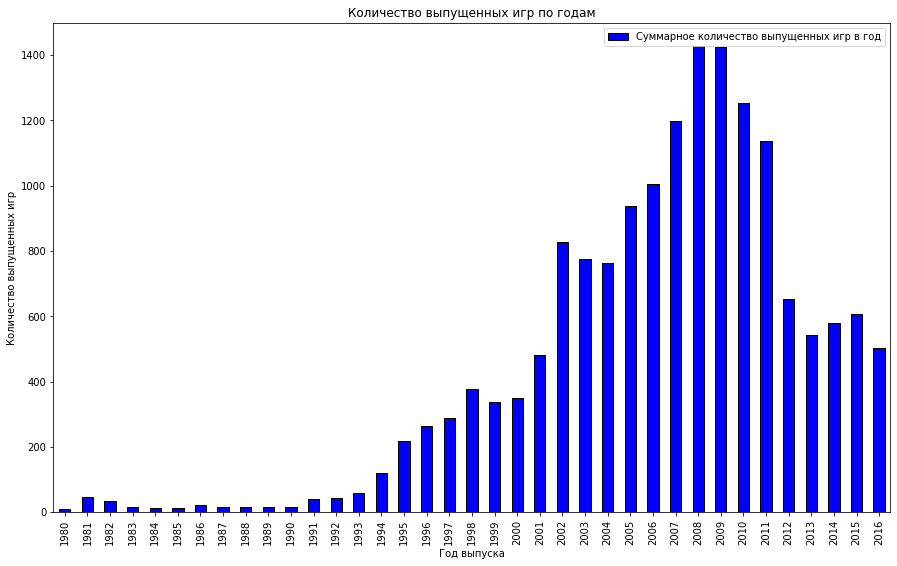

In [33]:
df_pivot_year_of_release = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
print(df_pivot_year_of_release)
df_pivot_year_of_release.plot(y='name', kind ='bar', figsize=(15, 9), ec='black', color='b', label = 'Суммарное количество выпущенных игр в год')
plt.title('Количество выпущенных игр по годам')  
plt.xlabel('Год выпуска')  
plt.ylabel('Количество выпущенных игр') 
plt.show()

Мы имеем дело с данными от 1980 года. Действительно, 1980 год стал отправной точкой для по-настоящему доступных домашних компьютеров. До 1994 года игр было крайне мало, а В 1994 году Electronic Arts выпустили Need for Speed, которая позже породила самую успешную серию гоночных игр в мире и одну из десяти самых успешных серий видеоигр в целом. После этого самые наиболее ярко выраженные пики приходятся на 1998, 2002, 2008-2009 года. Затем следует спад, который, вероятно, связан с развитием мобильных устройств и социальных сетей.

#### Динамика продаж по платформам

Для начала посмотрим на суммарные продажи по всем платформам:

          total_sales
platform             
pcfx             0.03
gg               0.04
3do              0.10
tg16             0.16
ws               1.42
ng               1.44
scd              1.86
dc              15.95
gen             28.35
sat             33.59
psv             53.81
wiiu            82.19
2600            86.48
xone           159.32
gc             196.73
snes           200.04
n64            218.01
nes            251.05
xb             251.57
gb             254.43
pc             255.76
3ds            257.81
psp            289.53
gba            312.88
ps4            314.14
ps             727.58
ds             802.78
wii            891.18
ps3            931.34
x360           961.24
ps2           1233.56


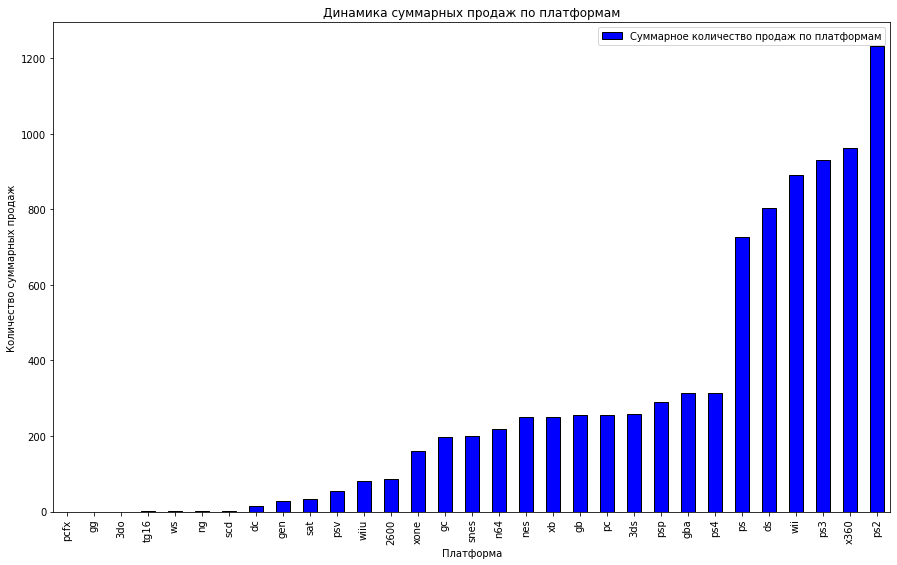

In [34]:
df_pivot_total_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by ='total_sales')
print(df_pivot_total_sales)
df_pivot_total_sales.plot(y='total_sales', kind ='bar', figsize=(15, 9), ec='black', color='b', label = 'Суммарное количество продаж по платформам')
plt.title('Динамика суммарных продаж по платформам')  
plt.xlabel('Платформа')  # подпишем ось Х
plt.ylabel('Количество суммарных продаж') 
plt.show()

Лидером является платформа PS2, что ожидаемо, поскольку она наиболее общеизвестна. 
Далее идут Xbox360, PS3, Wii, DS и PS. Количество суммарных продаж по остальным платформам существенно ниже, поэтому будет правильным выделить топ-6 наиболее популярных платформ:

In [35]:
# Сохраняем срез в данных по этим платформам в новой переменной
top_6_platforms = df.query('platform in ("ps", "ds", "wii", "ps3", "x360", "ps2")')                         

In [36]:
# проверим
top_6_platforms['platform'].unique()

array(['wii', 'ds', 'x360', 'ps3', 'ps2', 'ps'], dtype=object)

Теперь же посмотрим на динамику суммарных продаж по годам у платформ-лидеров продаж:

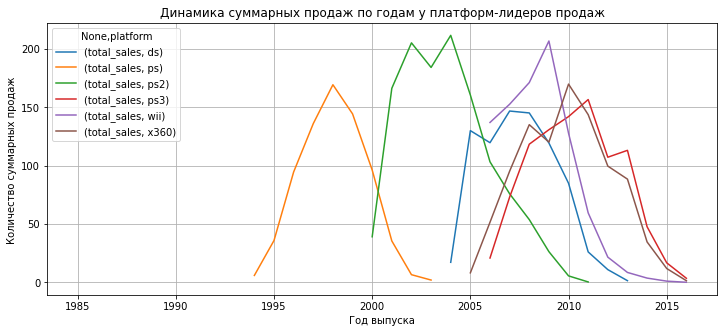

In [37]:
top_6_platforms.pivot_table(index = 'year_of_release', 
                            columns = 'platform',
                            aggfunc = {'total_sales':'sum'}).plot(grid=True, figsize=(12, 5))
plt.title('Динамика суммарных продаж по годам у платформ-лидеров продаж')  
plt.xlabel('Год выпуска')  
plt.ylabel('Количество суммарных продаж ') 
plt.show()

Посмотрим, на продолжительность жизни каждой платформы:

- Исходя из графика PS  прожила с 1994 года до 2003 (9 лет), что правдоподобно, так как релиз консоли состоялся 3 декабря 1994 года в Японии

- PS2 существовала в период с 2000 по 2011 год (11 лет), данные так же не противоречат дате релиза (2000 год)

- Срок жизни консоли DS составляет 9 лет (2004 - 2013)

Срок жизни оставшихся платформ приблизительно такой же, так что можно утверждать, что в среднем платформа живет около 10 лет.


#### Динамика продаж игр в настоящий момент

Теперь нам необходимо выбрать актуальный временной диапазон данных по определенным платформам, который поможет построить нам прогноз на 2017 год.

Исходя из предыдущего анализа и здравого смысла данные следует отбирать по двум критериям:
    
1) Продажи по платформам начались не позднее 10 лет назад (средний срок жизни платформы)


2) Платформы имеют продажи в настоящее время

In [38]:
#определим платформы, игры на которые продаются сейчас:
actual_sales_platform = df.query('year_of_release == 2016').platform.unique()

In [39]:
# А теперь выберем данные, где продажи по платформам начались не позднее 10 лет назад 
current_df = df.query('year_of_release >= 2005 and platform in @actual_sales_platform')

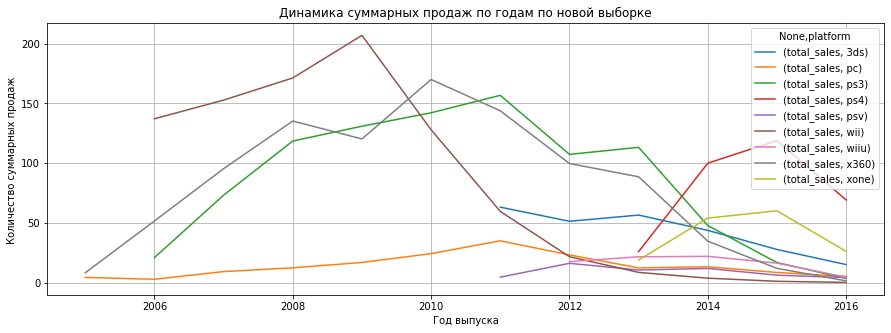

In [40]:
current_df.pivot_table(index = 'year_of_release', 
                            columns = 'platform',
                            aggfunc = {'total_sales':'sum'}).plot(grid=True, figsize=(15, 5))
plt.title('Динамика суммарных продаж по годам по новой выборке')  
plt.xlabel('Год выпуска')  
plt.ylabel('Количество суммарных продаж ') 
plt.show()


На конец 2016 можно выделить топ-3 платформ, лидирующих по продажам:

- PS4

- Xone

- 3DS.

Исходя из данных, стоит отметить, что количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сделать вывод, что весь рынок игр находится в состоянии рецессии.

#### Диаграмма размаха глобальных продаж игр  в разбивке по платформам

Сначала построим boxplot по глобальным продажам игр:

In [41]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,2.688081,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,4.170124,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


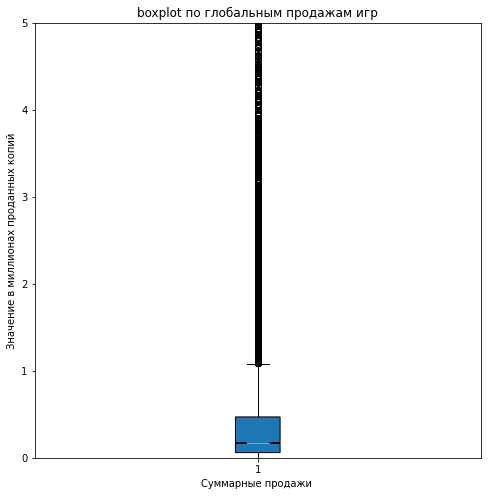

In [42]:
plt.figure(figsize =(8, 8))
plt.boxplot(df['total_sales'],  notch=True, sym="o", widths = 0.1, patch_artist = True)
plt.title('boxplot по глобальным продажам игр')
plt.xlabel('Суммарные продажи ')
plt.ylabel('Значение в миллионах проданных копий')
plt.ylim(0,5) # задаем ограничение на оси ординат, чтобы график стал более читаемым
plt.show()



 Мы видим, что очень много выбросов. В среднем, продажи игр составляют до 1.1 миллионов проданных копий. Медиана находится на уровне  0.2 млн. В целом, статистика не самая хорошая.

А теперь постоим диаграмму размаха суммарных продаж по топовым платформам (которые мы определили ранее):

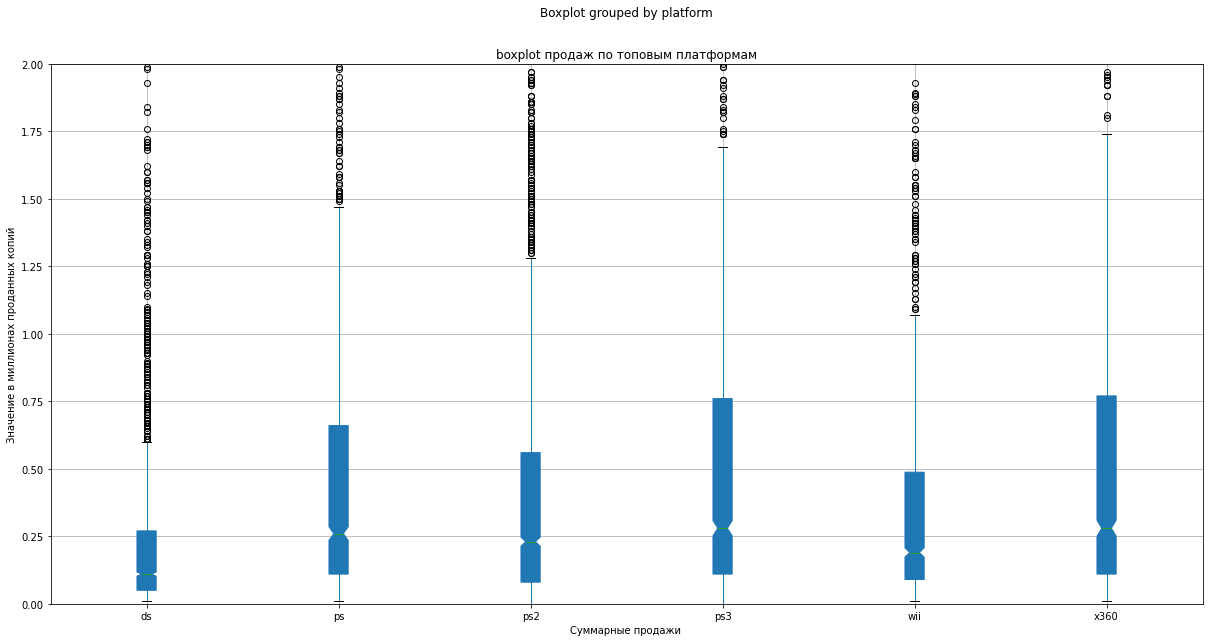

In [43]:
top_6_platforms.boxplot(column = ['total_sales'], by = ['platform'], figsize =(20, 10),  notch=True, sym="o", widths = 0.1, patch_artist = True)
plt.title('boxplot продаж по топовым платформам')
plt.xlabel('Суммарные продажи ')
plt.ylabel('Значение в миллионах проданных копий')
plt.ylim(0,2) # задаем ограничение на оси ординат, чтобы график стал более читаемым
plt.show()



Медиана по топовым платформам варьируется от 0.1 до 0.3 млн проданных копий за игру.
Верхняя граница предела, за которыми располагаются выбросы, у двух платформ (PS3 и X360) находится на уровне 1.7 млн.
У остальных - от 0.6 до 1.5 млн, а наименьшие суммарные прожажи у платформы DS.


#### Влияние отзывов  пользователей и критиков на продажи на примере платформы PS3

В данном разделе мы посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

В качестве платформы выберем PS3. Несмотря на то, что она не входит в топ-3 платформ, лидирующих по продажам на конец 2016, - она давно на рынке, по ней достаточно много данных, и показатели на конец 2016 года тоже весьма неплохие.

In [44]:
# сделаем срез в данных по этой платформе и существующими отзывами критиков
df_critic_ps3 = df.query('platform == "ps3" and critic_score > 0 ')

# сделаем срез в данных по этой платформе и существующими отзывами пользователей
df_user_ps3 = df.query('platform == "ps3" and user_score > 0 ')

**Влияние на продажи отзывов критиков**

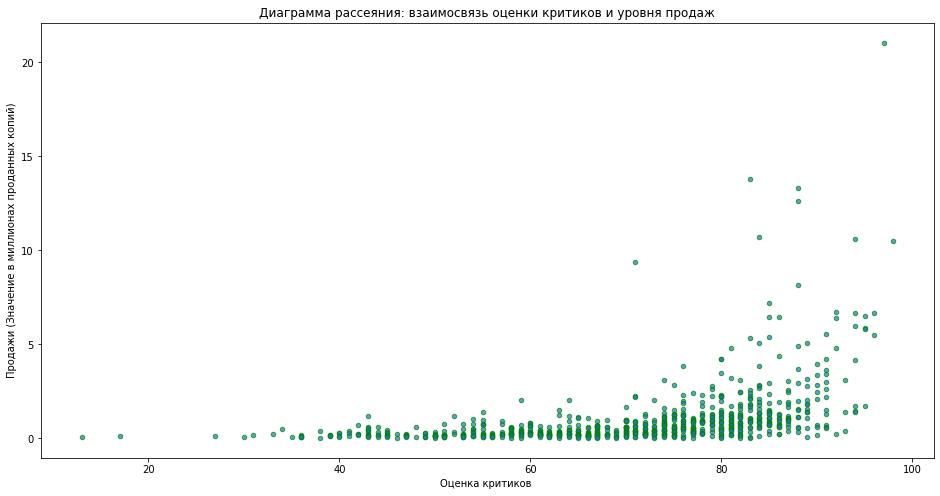

In [45]:
# Построим диаграмму рассеяния
df_critic_ps3.plot(x='critic_score', y='total_sales', kind='scatter', figsize = (16,8), ec='green', alpha = 0.7)
plt.title('Диаграмма рассеяния: взаимосвязь оценки критиков и уровня продаж')
plt.xlabel('Оценка критиков ')
plt.ylabel('Продажи (Значение в миллионах проданных копий)')
plt.show()

 Есть основная масса точек с наиболее частыми сочетаниями оценки критиков и уровня продаж. При этом с увеличением оценки критиков увеличивается и уровень продаж игр, что достаточно логично - чем качественнее сделана игра, тем выше ее оценят критики, а следовательно и продаваться она будет лучше.

In [46]:
# посмотрим на корреляционную матрицу
df_critic_ps3.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.053523,0.020449,0.105950,0.002588,-0.001309,0.005826,-0.003547
na_sales,-0.053523,1.000000,0.826680,0.380498,0.872466,0.454413,0.170214,0.940527
eu_sales,0.020449,0.826680,1.000000,0.421490,0.978143,0.382536,0.134421,0.962073
jp_sales,0.105950,0.380498,0.421490,1.000000,0.420342,0.202937,0.176250,0.495844
other_sales,0.002588,0.872466,0.978143,0.420342,1.000000,0.394883,0.150456,0.975522
critic_score,-0.001309,0.454413,0.382536,0.202937,0.394883,1.000000,0.539693,0.432759
user_score,0.005826,0.170214,0.134421,0.176250,0.150456,0.539693,1.000000,0.168050
total_sales,-0.003547,0.940527,0.962073,0.495844,0.975522,0.432759,0.168050,1.000000


Коэффициент корреляции Пирсона между переменными critic_score и total_sales равен 0.43. Нельзя сказать, что связь очень сильная, так же как и то, что именно оценка критиков определяет продажи, а не наоборот (коэффициент не говорит о наличии причинно-следственной связи), но тем не менее она есть.

**Влияние на продажи отзывов пользователей**

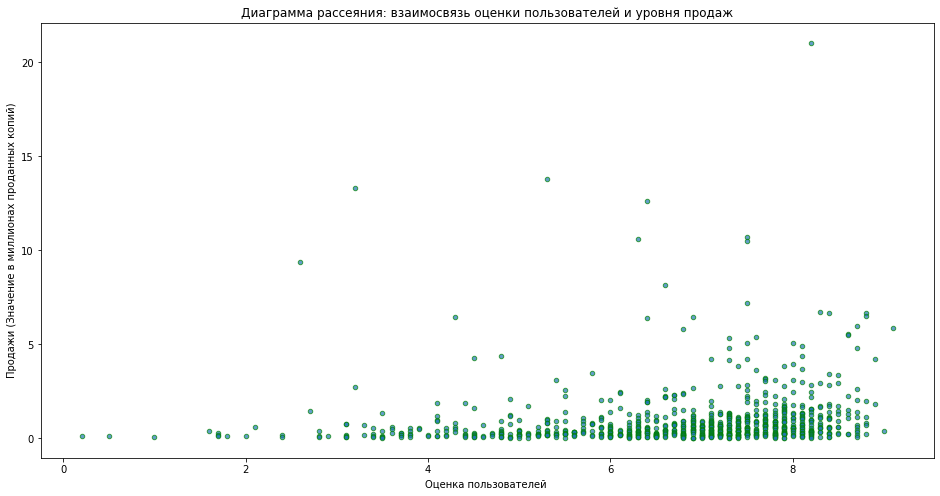

In [47]:
# Построим диаграмму рассеяния
df_user_ps3.plot(x='user_score', y='total_sales', kind='scatter', figsize = (16,8), ec='green', alpha = 0.7)
plt.title('Диаграмма рассеяния: взаимосвязь оценки пользователей и уровня продаж')
plt.xlabel('Оценка пользователей ')
plt.ylabel('Продажи (Значение в миллионах проданных копий)')
plt.show()

Аналогичная ситуация - чем выше оценка пользователей, тем выше и уровень продаж, однако на этом графике  больше выбросов, то есть бывают случаи, когда рейтинг пользователей крайне мал, а продажи при этом колоссальные. Такое бывает когда есть некоторые завышенные ожидания относительно игры (новой версии популярной в прошлом игры, например), а на деле игра выходит не очень удачной, откуда и низкие отзывы.




In [48]:
# посмотрим на корреляционную матрицу
df_user_ps3.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.099383,-0.011087,0.068971,-0.034794,-0.384609,-0.125317,-0.045358
na_sales,-0.099383,1.000000,0.816482,0.371078,0.871462,0.326746,0.137699,0.937776
eu_sales,-0.011087,0.816482,1.000000,0.408757,0.974160,0.251928,0.087823,0.959317
jp_sales,0.068971,0.371078,0.408757,1.000000,0.410892,0.142193,0.171022,0.486510
other_sales,-0.034794,0.871462,0.974160,0.410892,1.000000,0.271985,0.111490,0.975761
critic_score,-0.384609,0.326746,0.251928,0.142193,0.271985,1.000000,0.418592,0.299975
user_score,-0.125317,0.137699,0.087823,0.171022,0.111490,0.418592,1.000000,0.128416
total_sales,-0.045358,0.937776,0.959317,0.486510,0.975761,0.299975,0.128416,1.000000


 Коэффициент корреляции Пирсона между переменными user_score и total_sales равен 0.128416, что говорит о слабой статистической взаимосвязи между этими показателями. Отзывы критиков связаны с продажами гораздо сильнее.


#### Сравнение влияния отзывов на продажи платформы PS3 с другими платформами

In [49]:
# сделаем срез в данных по всем платформам кроме этой и существующими отзывами критиков
df_critic_not_ps3 = df.query('platform != "ps3" and critic_score > 0 ')

# сделаем срез в данных по всем платформам кроме этой и существующими отзывами пользователей
df_user_not_ps3 = df.query('platform != "ps3" and user_score > 0 ')

**Влияние на продажи отзывов критиков у всех остальных платформ, кроме ps3**

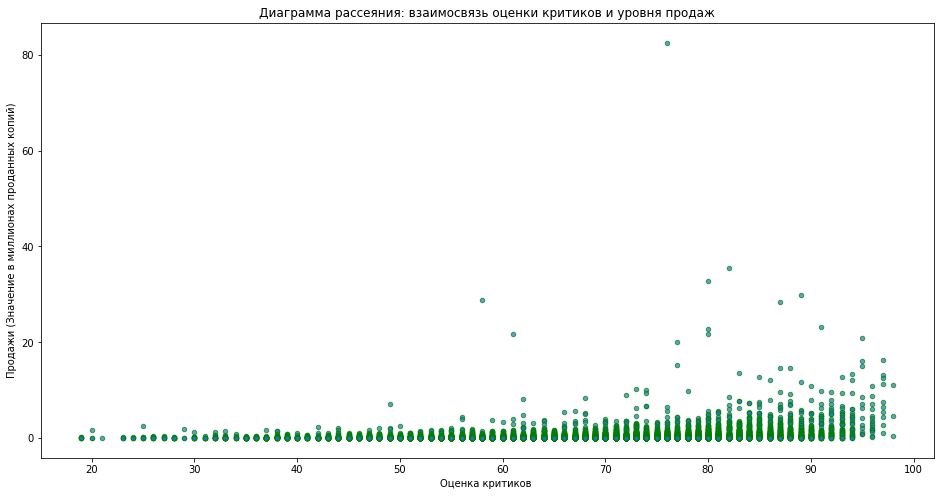

In [50]:
# Построим диаграмму рассеяния
df_critic_not_ps3.plot(x='critic_score', y='total_sales', kind='scatter', figsize = (16,8), ec='green', alpha = 0.7)
plt.title('Диаграмма рассеяния: взаимосвязь оценки критиков и уровня продаж')
plt.xlabel('Оценка критиков ')
plt.ylabel('Продажи (Значение в миллионах проданных копий)')
plt.show()

В целом, диаграммы рассеяния у всех остальных платформ и у платформы PS3 очень похожи и интерпретировать их можно точно так же.

In [51]:
# посмотрим на корреляционную матрицу
df_critic_not_ps3.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.007169,0.037527,-0.034797,0.035659,0.003642,0.047173,0.008817
na_sales,-0.007169,1.000000,0.849668,0.475174,0.720536,0.221840,0.124918,0.958661
eu_sales,0.037527,0.849668,1.000000,0.536031,0.680099,0.199252,0.107880,0.938760
jp_sales,-0.034797,0.475174,0.536031,1.000000,0.402830,0.151585,0.119712,0.625217
other_sales,0.035659,0.720536,0.680099,0.402830,1.000000,0.170886,0.100093,0.787394
critic_score,0.003642,0.221840,0.199252,0.151585,0.170886,1.000000,0.432183,0.224768
user_score,0.047173,0.124918,0.107880,0.119712,0.100093,0.432183,1.000000,0.130764
total_sales,0.008817,0.958661,0.938760,0.625217,0.787394,0.224768,0.130764,1.000000


А вот коэффициент корреляции между отзывами критиков и уровнем продаж существенно ниже ( У ps3 - 0.432759, а здесь - 0.224768 ), что сигнализирует о том, что связь между этими двумя пременными более слабая.

**Влияние на продажи отзывов пользователей у всех остальных платформ, кроме ps3**

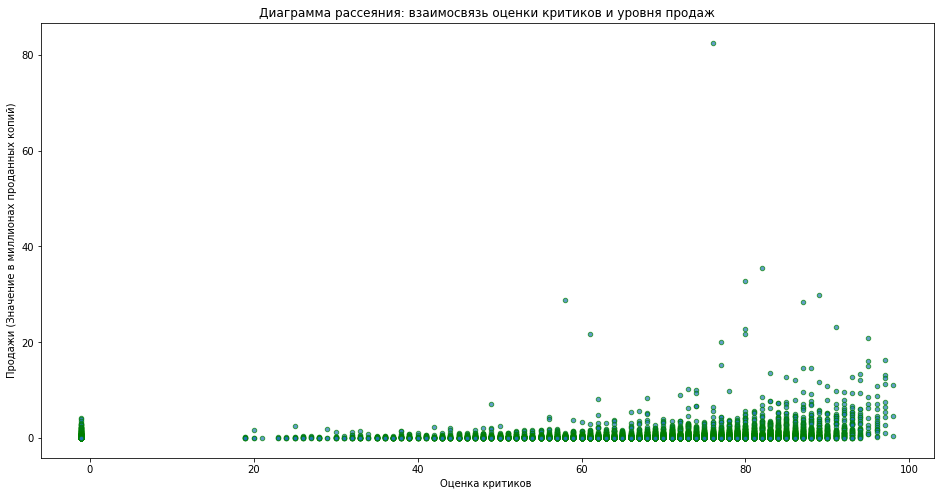

In [52]:
# Построим диаграмму рассеяния
df_user_not_ps3.plot(x='critic_score', y='total_sales', kind='scatter', figsize = (16,8), ec='green', alpha = 0.7)
plt.title('Диаграмма рассеяния: взаимосвязь оценки критиков и уровня продаж')
plt.xlabel('Оценка критиков ')
plt.ylabel('Продажи (Значение в миллионах проданных копий)')
plt.show()

Существенных различий так же нет, однако здесь есть сосредоточение точек в области нуля, что можно интерпретировать как неплохие продажи игр с нулевым пользовательским рейтингом. Но это опять же исходит от ложных ожиданий пользователей относительно новой игры.

In [53]:
# посмотрим на корреляционную матрицу
df_user_not_ps3.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.032173,0.017456,-0.054389,0.015824,-0.125570,-0.265291,-0.016155
na_sales,-0.032173,1.000000,0.846299,0.472097,0.714990,0.161834,0.083696,0.957739
eu_sales,0.017456,0.846299,1.000000,0.534637,0.675307,0.144732,0.058331,0.937658
jp_sales,-0.054389,0.472097,0.534637,1.000000,0.399357,0.126903,0.126893,0.623665
other_sales,0.015824,0.714990,0.675307,0.399357,1.000000,0.114106,0.059762,0.783885
critic_score,-0.125570,0.161834,0.144732,0.126903,0.114106,1.000000,0.417954,0.165039
user_score,-0.265291,0.083696,0.058331,0.126893,0.059762,0.417954,1.000000,0.088998
total_sales,-0.016155,0.957739,0.937658,0.623665,0.783885,0.165039,0.088998,1.000000


Вывод аналогичен, у всех остальных платформ (в совокупности) более слабая связь между отзывами пользователей и уровнем продаж. Таким образом, мы сравнили выводы от продаж игр на платформе PS3 с продажами игр на других платформах, и можем переходить к следующему пункту исследования:

#### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам и ответим на два вопроса:
- Что можно сказать о самых прибыльных жанрах?

- Выделяются ли жанры с высокими и низкими продажами?

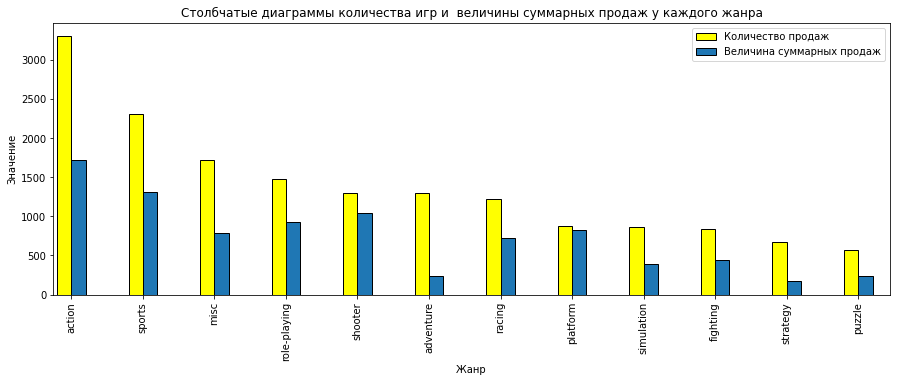

In [54]:
# построим столбчатые диаграммы количества игр и  величины суммарных продаж у каждого жанра
ax = plt.gca()
games_by_genre = df.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

first = games_by_genre ['name']
first.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1, color ='yellow')

second = games_by_genre['total_sales']
second.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=0)

ax.legend(['Количество продаж', 'Величина суммарных продаж'])
plt.title('Столбчатые диаграммы количества игр и  величины суммарных продаж у каждого жанра')
plt.xlabel('Жанр ')
plt.ylabel('Значение')
plt.show()

Больше всего игр жанра "Action". За ними идут игры  жанра "sports". Причем, несмотря на то, что игр жанра "sport" заметно меньше на рынке (примерно на четверть от "action"), выручка величина продаж (в миллионах копий) у них почти сопоставима. 

Меньше все продается игр жанра "puzzle", однако объем продаж у них почти такой же как у жанра "adventure".

### Портрет пользователя каждого региона

Нужно определить для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5) (Опишите различия в долях продаж)

- Самые популярные жанры (топ-5) (Пояснить разницу)

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Топ-5 популярных платформ в каждом регионе

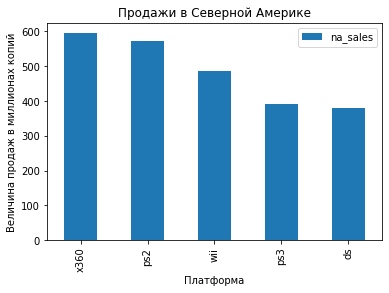

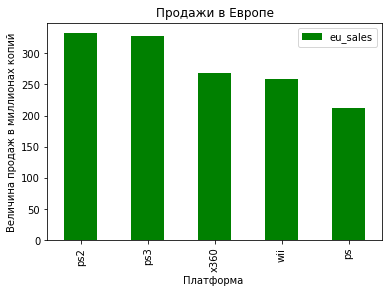

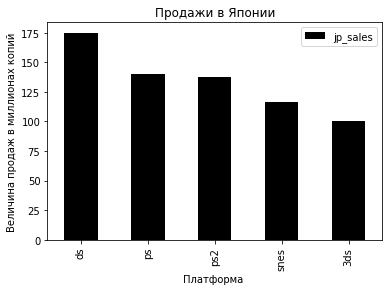

In [55]:
# Построим столбчатые диаграммы продаж в каждом регионе в разбивке по платформам

df.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',title ='Продажи в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Величина продаж в миллионах копий')
plt.show()



df.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title='Продажи в Европе', color = 'green')
plt.xlabel('Платформа ')
plt.ylabel('Величина продаж в миллионах копий')
plt.show()


df.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title = 'Продажи в Японии', color ='black')
plt.xlabel('Платформа ')
plt.ylabel('Величина продаж в миллионах копий')
plt.show()

Исходя из графиков, мы можем сделать вывод о том, какие плаформы были популярны в данных регионах, и есть ли какая-то специфика.

**Северная Америка:**

В Северной Америке пользуются колоссальным успехом платформы X360 и PS2, чуть меньше жалуют Wii, а наименьшее предпочтение отдают DS, соответственно.

**Европа:**

В Европе одинаково популярны PS2 и PS3. За ними следуют X360, Wii и PS, соответственно.

**Япония:**

В Японии предпочтения сильно разнятся с Европой и Северной Америкой. Лидирующую позицию занимает DS, затем бок о бок идут PS и PS2, а далее платформы SNES и 3DS, которые вообще не входят в топ-5 в Европе и Северной Америке.

    

#### Топ-5 популярных жанров в каждом регионе

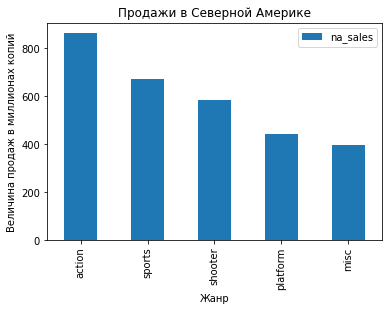

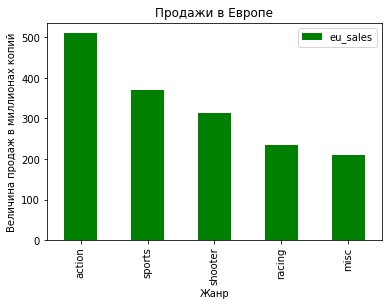

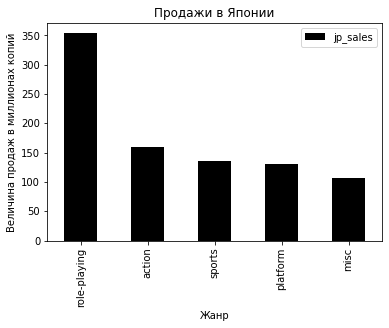

In [56]:
# Построим столбчатые диаграммы продаж в каждом регионе в разбивке по жанрам

df.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',title ='Продажи в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Величина продаж в миллионах копий')
plt.show()



df.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title='Продажи в Европе', color = 'green')
plt.xlabel('Жанр')
plt.ylabel('Величина продаж в миллионах копий')
plt.show()


df.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title = 'Продажи в Японии', color ='black')
plt.xlabel('Жанр')
plt.ylabel('Величина продаж в миллионах копий')
plt.show()

Исходя из графиков, мы можем сделать вывод о том, какие жанры были популярны в данных регионах, и есть ли какая-то специфика.

Вкусовые предпочтения пользователей **Северной Америки** и **Европы** схожи - топ-3 игровных жанров занимают "action", "sports" и "shooter", соответственно. В **Северной Америке** больше жалуют "platform", а в Европе - гонки.

**Япония**, опять же идет вразрез с этими тенденциями - наиболее популярным жанром являются ролевые игры и только потом "action" и "sports".


#### Влияние рейтинга ESRB на продажи в отдельном регионе

Вспомним расшифровку аббревиатур:

- «EC» («Early childhood») — «Для детей младшего возраста»

- «E» («Everyone») — «Для всех»

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

- «T» («Teen») — «Подросткам»

- «M» («Mature») — «Для взрослых»

- «AO» («Adults Only 18+») — «Только для взрослых»

- «RP» («Rating Pending») — «Рейтинг ожидается»

** "K-A" ("Kids to Adults") - устаревшее название, которое нужно внести в категорию «E» («Everyone»)

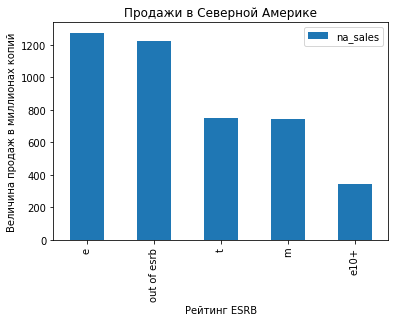

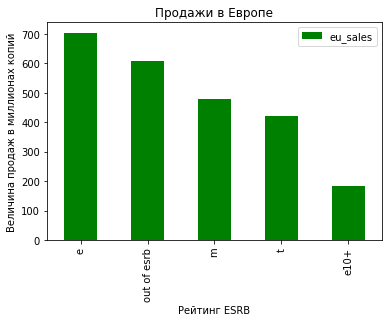

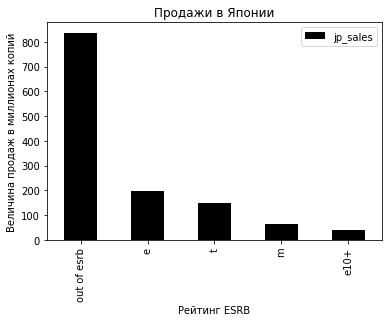

In [57]:
# Построим столбчатые диаграммы продаж в каждом регионе в разбивке по рейтингу ESRB

df.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',title ='Продажи в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Величина продаж в миллионах копий')
plt.show()



df.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title='Продажи в Европе', color = 'green')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Величина продаж в миллионах копий')
plt.show()


df.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title = 'Продажи в Японии', color ='black')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Величина продаж в миллионах копий')
plt.show()

Напомним, что  для пропущенных значений мы решили создать отдельную категорию "out of esrb".

В **Северной Америке** и в **Европе**, опять же, существенных различий нет. Большая часть продаж приходится на игры с рейтингом "Для всех". В **Северной Америке** одинаково пользуются игры категорий «Подросткам» и «Для взрослых»а в Европе из этих двух категорий наиболее популярна  «Для взрослых».

В **Японии** рейтинг наибольших продаж, к сожалению, не известен, но, в целом, тенденции сохраняются.


### Проверка гипотез

Необходимо принять или опровергнуть гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Можем приступать к проверки гопотез. Поскольку сравниваемые выборки независимы между собой - будем использовать t-критерий Стьюдента. Воспользуемся функцией ttest_ind из модуля scipy.stats.

#### Гипотеза № 1

Были сформулированы следующие гипотезы:

**H0:** Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**

**H1:** Средние пользовательские рейтинги платформ Xbox One и PC **разные**

In [58]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [59]:
# Задаем пороговое значение
alpha = 0.05

# Cоздаем подвыборки с интересующими на платформами и ненулевым пользовательским рейтингом, выбираем интересующий столбец
platform_xone = df[(df['platform'] == 'xone') & (df['user_score'] > 0)]['user_score']
platform_pc = df[(df['platform'] == 'pc') & (df['user_score'] > 0)]['user_score']

results = st.ttest_ind(platform_xone, platform_pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


**Вывод:** Есть значимые различия между выборками.Средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

### Гипотеза № 2

Были сформулированы следующие гипотезы:

**H0:** Средние пользовательские рейтинги жанров action и sports **одинаковые**

**H1:** Средние пользовательские рейтинги жанров action и sports **разные**

In [60]:
# Задаем пороговое значение
alpha = 0.05

# Cоздаем подвыборки с интересующими нас жанрами и ненулевым пользовательским рейтингом, выбираем интересующий столбец
genre_action = df[(df['genre'] == 'action') & (df['user_score'] > 0)]['user_score']
genre_sports = df[(df['genre'] == 'sports') & (df['user_score'] > 0)]['user_score']

results = st.ttest_ind(genre_action, genre_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


Поскольку нулевую гипотезу отвергнуть не получилось, то можно сказать, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

### Общий вывод:

- Мы имеем дело с данными от 1980 года. Действительно, 1980 год стал отправной точкой для по-настоящему доступных домашних компьютеров. Количество выпущенных игр достигло апогея в 2008-2009 годах, однако затем следует спад, который, вероятно, связан с развитием мобильных устройств и социальных сетей.

- Лидером по суммарным продажам является платформа PS2, что ожидаемо, поскольку она наиболее общеизвестна. Далее идут Xbox360, PS3, Wii, DS и PS. Можно сказать, что эти платформы составляют топ-6 наиболее популярных платформ.

- В среднем, срок жизни игровой платформы составляет около 10 лет.

- На конец 2016 можно выделить топ-3 платформ, лидирующих по продажам:

1) PS4

2) Xone

3) 3DS.

Стоит отметить, что количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сделать вывод, что весь рынок игр находится в состоянии рецессии.

- Существенное влияние на величину оказывают, в большинстве своем, оценки критиков. Пользовательский рейтинг имеет меньшую степень влияния, поскольку часто возникает ситуация, когда рейтинг пользователей крайне мал, а продажи при этом колоссальные. Это обусловлено завышенными ожиданиями относительно той или иной игры, которая по итогу выходит не совсем удачной.

- Наиболее прибыльными игровыми жанрами являются "action" и "sports"

**Предпочтения регионов по платформам:**

- В Северной Америке пользуются колоссальным успехом платформы X360 и PS2, чуть меньше жалуют Wii, а наименьшее предпочтение отдают DS, соответственно.

- В Европе одинаково популярны PS2 и PS3. За ними следуют X360, Wii и PS, соответственно.

- В Японии предпочтения сильно разнятся с Европой и Северной Америкой. Лидирующую позицию занимает DS, затем бок о бок идут PS и PS2, а далее платформы SNES и 3DS, которые вообще не входят в топ-5 в Европе и Северной Америке.

**Предпочтения регионов по жанрам:**

- Вкусовые предпочтения пользователей Северной Америки и Европы схожи - топ-3 игровных жанров занимают "action", "sports" и "shooter", соответственно. В Северной Америке больше жалуют "platform", а в Европе - гонки.

 Япония, опять же идет вразрез с этими тенденциями - наиболее популярным жанром являются ролевые игры и только потом "action" и "sports".

- Средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

- Средние пользовательские рейтинги жанров Action и Sports не имеют значимых различий.